In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

646

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9bba9e4e4e6d5c29377c372a9c9cdd0f


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | loukhi
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | los llanos de aridane
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | pangnirtung
Processing Record 7 of Set 1 | tabuk
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 10 of Set 1 | sarapul
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | shirokiy
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | coquimbo
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | elk point
Processing Record 19 of Set 1 | la sarre
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | selma
Processing Re

Processing Record 38 of Set 4 | okhotsk
Processing Record 39 of Set 4 | honiara
Processing Record 40 of Set 4 | chuy
Processing Record 41 of Set 4 | banda aceh
Processing Record 42 of Set 4 | zhigansk
Processing Record 43 of Set 4 | chabahar
Processing Record 44 of Set 4 | butaritari
Processing Record 45 of Set 4 | kamskoye ustye
Processing Record 46 of Set 4 | port elizabeth
Processing Record 47 of Set 4 | huntsville
Processing Record 48 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 49 of Set 4 | sabha
Processing Record 50 of Set 4 | don sak
Processing Record 1 of Set 5 | ordzhonikidze
Processing Record 2 of Set 5 | ponta do sol
Processing Record 3 of Set 5 | otradnoye
Processing Record 4 of Set 5 | ribeira grande
Processing Record 5 of Set 5 | lazaro cardenas
Processing Record 6 of Set 5 | mangan
Processing Record 7 of Set 5 | walvis bay
Processing Record 8 of Set 5 | karamea
City not found. Skipping...
Processing Record 9 of Set 5 | mosetse
Processing Record 10 

Processing Record 27 of Set 8 | puerto cabezas
Processing Record 28 of Set 8 | ceatalchioi
Processing Record 29 of Set 8 | faanui
Processing Record 30 of Set 8 | karauzyak
City not found. Skipping...
Processing Record 31 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 32 of Set 8 | kamenka
Processing Record 33 of Set 8 | barranca
Processing Record 34 of Set 8 | dongsheng
Processing Record 35 of Set 8 | gamba
Processing Record 36 of Set 8 | basco
Processing Record 37 of Set 8 | lemon tree passage
Processing Record 38 of Set 8 | hami
Processing Record 39 of Set 8 | norsup
Processing Record 40 of Set 8 | shenxian
Processing Record 41 of Set 8 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 42 of Set 8 | tiarei
Processing Record 43 of Set 8 | urengoy
Processing Record 44 of Set 8 | emerald
Processing Record 45 of Set 8 | mokhsogollokh
Processing Record 46 of Set 8 | kutum
Processing Record 47 of Set 8 | bamberg
Processing Record 48 of Set 8 | ipora
P

Processing Record 15 of Set 12 | hasaki
Processing Record 16 of Set 12 | burnie
Processing Record 17 of Set 12 | cody
Processing Record 18 of Set 12 | owensboro
Processing Record 19 of Set 12 | nantucket
Processing Record 20 of Set 12 | teguldet
Processing Record 21 of Set 12 | mersing
Processing Record 22 of Set 12 | port keats
Processing Record 23 of Set 12 | ponta delgada
Processing Record 24 of Set 12 | dombarovskiy
Processing Record 25 of Set 12 | port macquarie
Processing Record 26 of Set 12 | hofn
Processing Record 27 of Set 12 | santa ines
Processing Record 28 of Set 12 | bodden town
Processing Record 29 of Set 12 | raga
Processing Record 30 of Set 12 | apozol
Processing Record 31 of Set 12 | namatanai
Processing Record 32 of Set 12 | ilheus
Processing Record 33 of Set 12 | dubreka
Processing Record 34 of Set 12 | chikwawa
Processing Record 35 of Set 12 | puerto colombia
Processing Record 36 of Set 12 | gobabis
Processing Record 37 of Set 12 | nivala
Processing Record 38 of Set

In [10]:
len(city_data)

590

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,39.20,55,98,6.93,AR,2020-05-06 03:15:00
1,Loukhi,66.08,33.04,34.32,90,0,6.71,RU,2020-05-06 03:15:00
2,Los Llanos De Aridane,28.66,-17.92,66.20,63,20,6.93,ES,2020-05-06 03:13:29
3,Yellowknife,62.46,-114.35,41.00,44,20,14.99,CA,2020-05-06 03:15:01
4,Pangnirtung,66.15,-65.71,9.25,87,0,2.73,CA,2020-05-06 03:15:01
5,Tabuk,17.42,121.44,90.03,57,12,4.72,PH,2020-05-06 03:15:01
6,Rikitea,-23.12,-134.97,73.22,71,92,16.06,PF,2020-05-06 03:15:01
7,Sarapul,56.48,53.80,59.00,44,0,1.99,RU,2020-05-06 03:15:02
8,Avarua,-21.21,-159.78,80.60,78,54,3.36,CK,2020-05-06 03:14:24
9,Bluff,-46.60,168.33,53.98,76,100,25.32,NZ,2020-05-06 03:15:02


In [12]:
# Reorder the columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2020-05-06 03:15:00,-54.80,-68.30,39.20,55,98,6.93
1,Loukhi,RU,2020-05-06 03:15:00,66.08,33.04,34.32,90,0,6.71
2,Los Llanos De Aridane,ES,2020-05-06 03:13:29,28.66,-17.92,66.20,63,20,6.93
3,Yellowknife,CA,2020-05-06 03:15:01,62.46,-114.35,41.00,44,20,14.99
4,Pangnirtung,CA,2020-05-06 03:15:01,66.15,-65.71,9.25,87,0,2.73
...,...,...,...,...,...,...,...,...,...
585,Paso De Carrasco,UY,2020-05-06 03:17:36,-34.86,-56.05,55.40,66,75,17.22
586,Kieta,PG,2020-05-06 03:17:36,-6.22,155.63,84.94,60,78,3.65
587,Kaeo,NZ,2020-05-06 03:17:36,-35.10,173.78,61.00,51,5,11.01
588,Te Anau,NZ,2020-05-06 03:17:36,-45.42,167.72,55.49,61,71,5.95


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## 6.3.1 Plot Latitude vs. Temperature


In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time

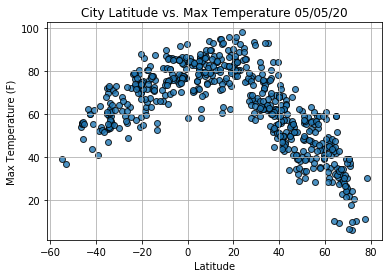

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

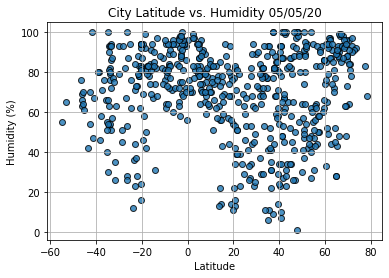

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

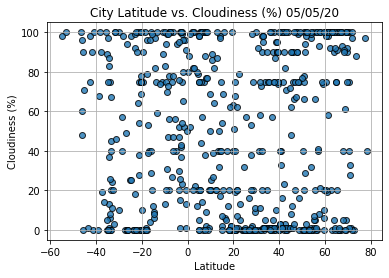

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

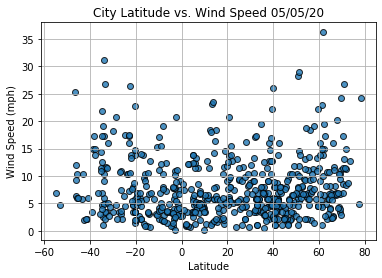

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## 6.4.1 Use Linear Regression to Find the Relationship